
#### Teoría de Circuitos II

# Trabajo Práctico N°2

#### Grupo 2

### Ejercicio 1

In [5]:
from IPython.display import IFrame
IFrame("Ejercicio_1_TP2.pdf", width=900, height=900)

#### Circuito
El filtro pasa bajos butterworth fue implementado en Spice con una estructura RLC paralelo.
<img src="Circuito_1.png">

Obteniendo en el análisis en frecuencia el siguiente gráfico, donde tenemos una atenuacion de -3db para la frecuencia de paso de 1KHz
<img src="Ejercicio_1_grafico.png">

### Ejercicio 2

In [1]:
from IPython.display import IFrame
IFrame("Ejercicio_2_TP2.pdf", width=900, height=900)

#### Grafico
El filtro fue implementado en Spice con las estructuras Sallen-Key
<img src="Ejercicio_2.png">

### Ejercicio 3

In [1]:
from IPython.display import IFrame
IFrame("Ejercicio_3_TP2.pdf", width=900, height=900)

#### Graficos
El filtro fue implementado en Spice con las estructuras Kerwin–Huelsman–Newcomb. El primer grafico esta planteado para impedancia y frecuencia normalizada.
<img src="Ejercicio_3_norm.png">

En este grafico tenemos la impedancia y frecuencia desnormalizada. Realizando el análisis en frecuencia obtenmos el siguiente gráfico, donde podemos apreciar que se cumplen las condiciones de la plantilla. Para una frecuencia de paso de 3.2Khz tenemos una pequeña atenuacion. Para la frecuencia de stop de 9.6KHz observamos que tenemos una atenuacion superior a la pedida (48dB)
<img src="Ejercicio_3_desnorm.png">

### Ejercicio 4

In [3]:
from IPython.display import IFrame
IFrame("Ejercicio_4_TP2.pdf", width=900, height=900)

#### Circuito
El filtro pasa alto fue implementado utilizando estructuras RLC pasivas, con los inductores activados mediante circuitos GIP
<img src="Circuito_4_activo.png">

#### Graficos
Realizando el análisis en frecuencia obtenmos el siguiente gráfico, donde podemos apreciar que se cumplen las condiciones de la plantilla. Para una frecuencia de paso de 3.5KHz, tenemos una atenucaion maxima de 1db. Para la frecuencia de stop de 1KHz tenemos una atenuacion de 37.65db, superior a la pedida (35dB)
<img src="Grafico_4_plantilla.png">

### Ejercicio 5

In [3]:
from IPython.display import IFrame
IFrame("Ejercicio_5_TP2.pdf", width=900, height=900)

#### Circuito
El filtro pasa alto fue implementado de dos formas en Spice.La primera las estructuras RLC pasivas, buffereadas. En la segunda se activaron los inductores mediante OTAs
##### Pasivo
<img src="Circuito_5_pasivo.png">

##### Activo
<img src="Circuito_5_activo.png">

#### Graficos
Realizando el análisis en frecuencia obtenmos el siguiente gráfico, donde podemos apreciar que se cumplen las condiciones de la plantilla. Para una frecuencia de paso de 9.6KHz, tenemos una atenucaion maxima de 0.4db. Para la frecuencia de stop de 3.2KHz tenemos una atenuacion de 60db, superior a la pedida (48dB)
<img src="Grafico_5_plantilla.png">

Al ser un filtro del tipo Chebyshev de orden 5, podemos ver el ripple contenido por el Alfa_Max = 0.4dB y con sus respectivos 5 toques.
<img src="Grafico_5_ripple.png">

con 2 alfa minimo es 14.606303
con 3 alfa minimo es 29.761586
con 4 alfa minimo es 45.067943
con 5 alfa minimo es 60.378833
Para maxima planicidad
con 2 alfa minimo es 9.452092
con 3 alfa minimo es 18.532881
con 4 alfa minimo es 28.020848
con 5 alfa minimo es 37.557179



--------------------------------
Transferencia pasabajo prototipo
--------------------------------


<IPython.core.display.Math object>




--------------------------------
Transferencia pasabanda prototipo
--------------------------------


<IPython.core.display.Math object>




------------------
Particiono en SOSs
------------------


<IPython.core.display.Math object>




------------------------------------------------
Particiono en SOSs parametrizados como nos gusta
------------------------------------------------


<IPython.core.display.Math object>

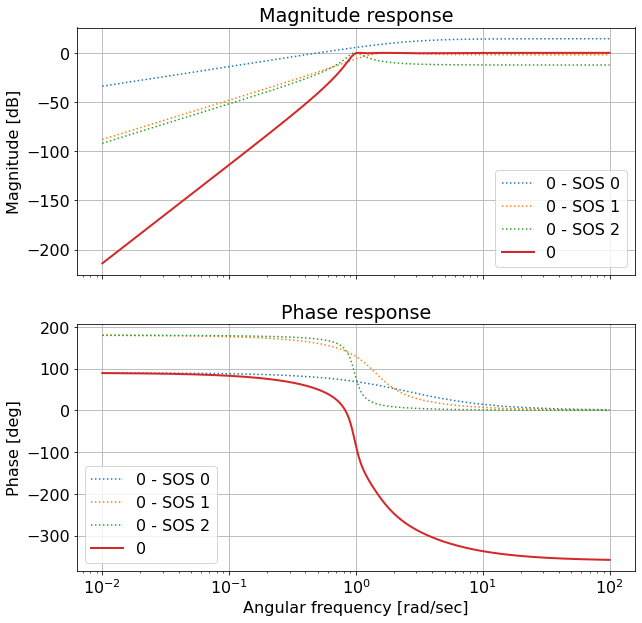

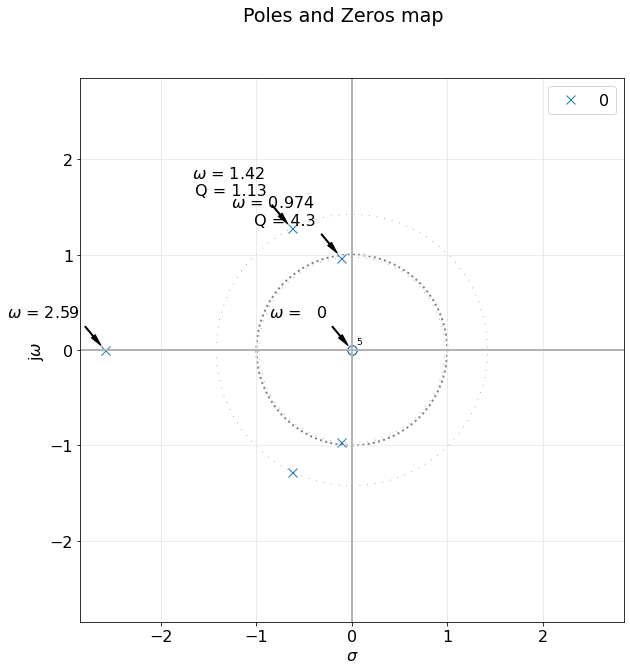

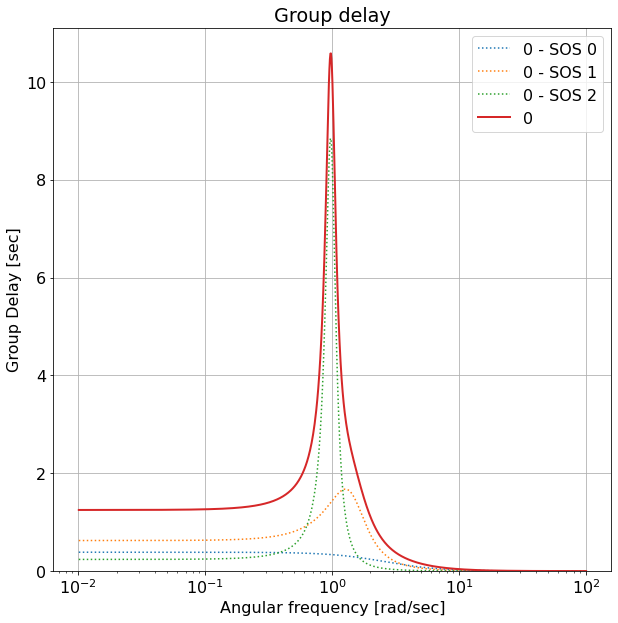

In [10]:
import numpy as np
import scipy.signal as sig
import splane as tc2
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,10)
fig_font_size = 16
plt.rcParams.update({'font.size':fig_font_size})

# de la plantilla pasaaltos llegamos a la plantilla pasabajo
alfa_max = 0.4 # dB
alfa_min = 48
fs = 3200
fp = 9600

wp_hp = fp * 2 * np.pi

ws_hp = fs * 2 * np.pi/wp_hp

wp_hp = 1

# cuentas auxiliares

# epsilon cuadrado
ee = 10**(alfa_max/10)-1

#print (ee)

Om_p = 1
Om_s = 1/ws_hp

for nn in range(2,6):
    alfa_min_w1 = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(Om_s))**2 )
    print('con {:d} alfa minimo es {:f}'.format( nn, alfa_min_w1) )
    
    
print("Para maxima planicidad")
for nn in range(2,6):
    alfa_min_w1 = 10*np.log10(1 + ee * (Om_s**(2*nn)) )
    print('con {:d} alfa minimo es {:f}'.format( nn, alfa_min_w1) )
    
nn=5   
den = [ -256,0,-640,0,-560,0,-200, 0, -25, 0,  10.363]
roots = np.roots(den)
#print(f'roots: {roots}')


z,p,k = sig.cheb1ap(nn, alfa_max)
num_pb, den_pb = sig.zpk2tf(z,p,k)

print('\n\n')
print('--------------------------------')
print('Transferencia pasabajo prototipo')
print('--------------------------------')
tc2.pretty_print_lti(num_pb, den_pb)

# particiono en 2 SOS's para la implementación
sos_pb = tc2.tf2sos_analog(num_pb, den_pb)

num_paltos, den_paltos = sig.lp2hp(num_pb, den_pb, 1)

print('\n\n')
print('--------------------------------')
print('Transferencia pasabanda prototipo')
print('--------------------------------')
tc2.pretty_print_lti(num_paltos, den_paltos)

# particiono en 2 SOS's para la implementación
sos_paltos = tc2.tf2sos_analog(num_paltos, den_paltos)

print('\n\n')
print('------------------')
print('Particiono en SOSs')
print('------------------')

# la visualizamos de algunas formas, la tradicional
tc2.pretty_print_SOS(sos_paltos)

print('\n\n')
print('------------------------------------------------')
print('Particiono en SOSs parametrizados como nos gusta')
print('------------------------------------------------')

# o parametrizada
tc2.pretty_print_SOS(sos_paltos, mode='omegayq')

plt.close('all')

tc2.analyze_sys( sos_paltos )

### Ejercicio 6

In [8]:
from IPython.display import IFrame
IFrame("Ejercicio_6_TP2.pdf", width=900, height=900)

#### Graficos
El filtro pasa bajo del tipo Bessel de orden 4 fue implementado utilizando estructuras Multiple FeedBack (MFB). 
<img src="Ejercicio_6.png">

### Ejercicio 7

In [1]:
from IPython.display import IFrame
IFrame("Ejercicio_7_TP2.pdf", width=900, height=900)

#### Graficos
A continuacion se muetra el grafico de modulo y fase, junto con el diagrama de polos y ceros:
<img src="modulo_fase.png">
<img src="polos_ceros.png">

El filtro fue implementado en Spice con las estructuras Ackerberg Mossberg
<img src="circuito_7.png">

Obtenemos en la banda de paso una ganancia máxima de 10dB
<img src="10db_grafico.png">

En las frecuencias de paso tenemos una atenuacion de aproximadamente -3dB respecto del máximo
<img src="3db.png">

En las frecuencias de stop tenemos una atenuacion de aproximadamente -20dB respecto del máximo
<img src="20db.png">

### Ejercicio 8

In [7]:
from IPython.display import IFrame
IFrame("Ejercicio_8_TP2.pdf", width=900, height=900)

#### Circuito
El filtro pasa alto fue implementado con una estructura de segundo orden bicuadrático y canónico, que utiliza OTAs.
<img src="Circuito_8.png">

#### Graficos
Realizando el análisis en frecuencia obtenmos el siguiente gráfico, donde podemos apreciar que se cumplen las condiciones de la plantilla. Para una frecuencia de paso de 40KHz, tenemos una atenucaion maxima de 1db. Para la frecuencia de stop de 12KHz tenemos una atenuacion de 53.2db, muy cercana a la pedida (53.9dB)
<img src="Grafico_8_plantilla.png">

Al ser un filtro del tipo Chebyshev de orden 4, podemos ver el ripple contenido por el Alfa_Max = 1dB y con sus respectivos 4 toques.
<img src="Grafico_8_ripple.png">